In [34]:
import torch
from tpm import TreeParityMachine
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt

In [88]:
# K = number of hidden layer nodes
# N = number of inputs per hidden node
# L = [-L, +L] range each weight may take (synaptic weight)

update_rules = ["hebbian", "anti-hebbian", "random walk"]

In [129]:
def calculate_percent_synced(wa, wb, l):
    result = ((1.0 - torch.mean(1.0 * torch.abs(wa - wb) / (2*l))).item()) * 100
    return round(result, 3)

def generate_random_input(length):
    r_input = torch.randint(-1, 2, (1, length))
    r_input[r_input==0] = -1
    return r_input

In [134]:
def demonstrate(k=3, n=4, l=3, rule='hebbian'):
    tpm_alice = TreeParityMachine(k, n, l)
    tpm_bob = TreeParityMachine(k, n, l)
    i = 0
    matches = 0
    percent_synced = 0
    sync_list = []
    start = timer()
    while(percent_synced != 100):
        r_input = generate_random_input(k*n)
        tau_a = tpm_alice(r_input)
        tau_b = tpm_bob(r_input)

        if (tau_a == tau_b):
            tpm_alice.update(tau_b, rule=rule)
            tpm_bob.update(tau_a, rule=rule)
            wa = tpm_alice.get_weights()
            wb = tpm_bob.get_weights()
            percent_synced = calculate_percent_synced(wa, wb, l)
            matches+=1
        sync_list.append(percent_synced)
        #if (i % 50 == 0 or percent_synced == 100):
            #print("Percent synced: %.2f%%" % percent_synced)

        i+=1
    end = timer()
    style = 'Solarize_Light2'
    with plt.style.context(style):
        timesteps = np.arange(0, i, 1)
        fig, ax = plt.subplots(num=style, figsize=(14,8))
        ax.plot(timesteps, sync_list)
        ax.set(xlabel='Learning Steps', ylabel='% Synchronized', title='Synchronization Example Using %s Learning' % rule.title())

    plt.show()
    print("For %d hidden nodes, %d inputs per node, and synaptic depth (weight range) %d" % (k, n, l))
    print("Number of iterations: %d" % i)
    print("Elapsed time: %.2f" % (end-start))
    print("TPM Matches: %d" % matches)
    print("Final Weights")
    print("Alice: %s" % wa.data.numpy())
    print("Bob:   %s" % wb.data.numpy())

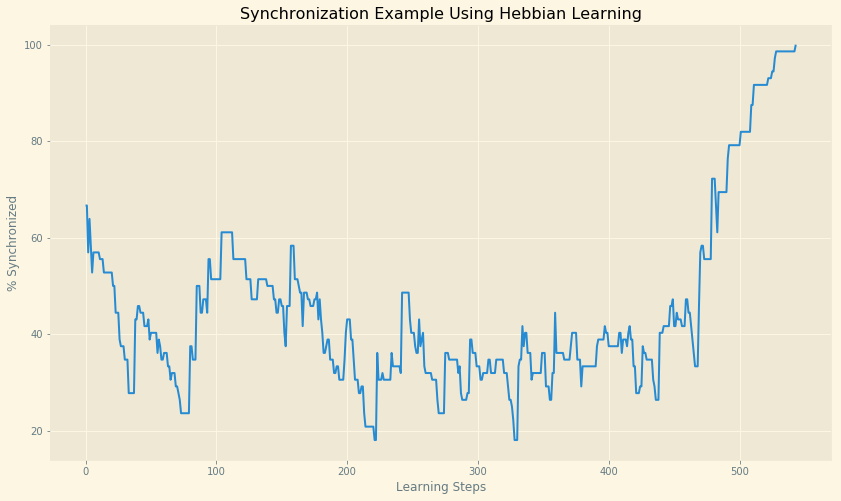

For 3 hidden nodes, 4 inputs per node, and synaptic depth (weight range) 3
Number of iterations: 544
Elapsed time: 0.31
TPM Matches: 340
Final Weights
Alice: [[3. 3. 1. 3. 3. 2. 3. 3. 3. 1. 3. 3.]]
Bob:   [[3. 3. 1. 3. 3. 2. 3. 3. 3. 1. 3. 3.]]


In [77]:
demonstrate(k=3, n=4, l=3, rule='hebbian')

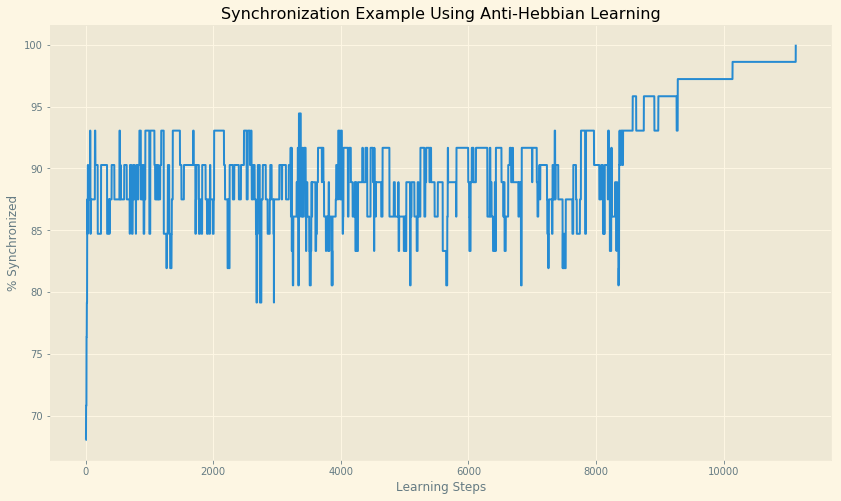

For 3 hidden nodes, 4 inputs per node, and synaptic depth (weight range) 3
Number of iterations: 11131
Elapsed time: 5.46
TPM Matches: 6824
Final Weights
Alice: [[-1.  0. -1.  1. -1.  1. -1. -2.  1.  1. -2. -3.]]
Bob:   [[-1.  0. -1.  1. -1.  1. -1. -2.  1.  1. -2. -3.]]


In [89]:
demonstrate(k=3, n=4, l=3, rule='anti-hebbian')

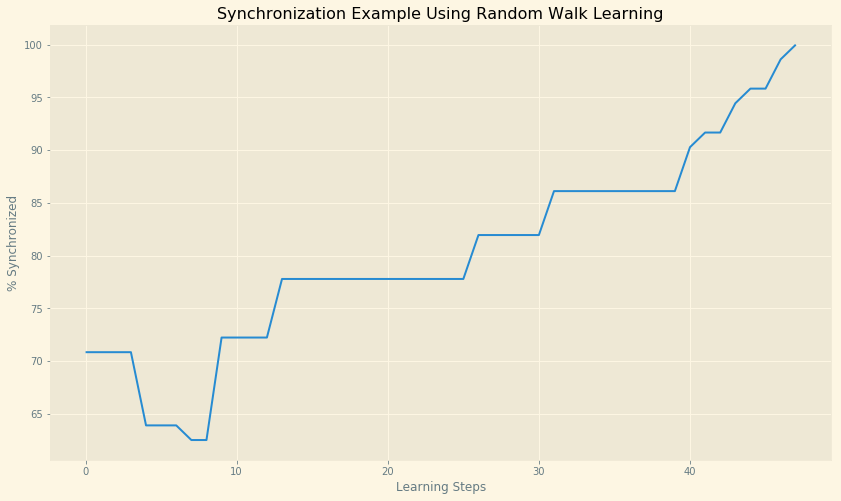

For 3 hidden nodes, 4 inputs per node, and synaptic depth (weight range) 3
Number of iterations: 48
Elapsed time: 0.03
TPM Matches: 30
Final Weights
Alice: [[-2.  0. -3. -3. -3. -2. -3. -3. -3. -3. -2.  3.]]
Bob:   [[-2.  0. -3. -3. -3. -2. -3. -3. -3. -3. -2.  3.]]


In [85]:
demonstrate(k=3, n=4, l=3, rule='random walk')

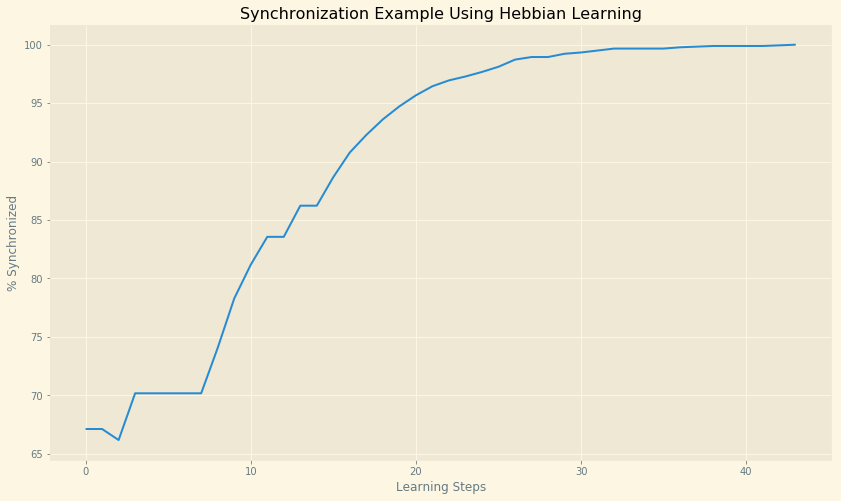

For 3 hidden nodes, 100 inputs per node, and synaptic depth (weight range) 3
Number of iterations: 44
Elapsed time: 0.76
TPM Matches: 38
Final Weights
Alice: [[-2. -3. -2. -3. -3. -3. -2. -2. -2.  0. -3.  1.  0. -2. -3. -3. -1. -3.
  -3.  0.  1.  2. -3. -3. -3.  0. -3. -2. -2. -2. -3. -3. -2. -3. -3. -3.
  -3.  0. -3. -3. -1. -3. -1.  0. -3. -2. -1. -2. -3. -3. -1. -2. -3. -3.
  -2. -3. -1. -3. -3. -3. -2. -3. -3. -3. -3. -2. -2. -3. -3. -3. -2. -3.
  -3. -3. -3.  1.  0.  1. -2. -3. -3. -3. -2. -2.  0. -2. -2. -3. -2. -1.
  -3. -3. -3. -2. -3. -1. -2. -3. -2. -3. -3. -3. -3. -3. -3. -3.  1. -3.
  -1. -2. -2. -2. -3. -3. -1. -2. -2. -3. -3.  2. -3. -2. -3. -3. -3. -2.
  -2. -1. -1. -3. -3. -3. -2. -3. -1. -3. -1. -1. -2. -2. -2. -3.  0. -2.
  -2. -1. -1. -2. -3. -1.  0. -2. -3. -3. -2. -3. -3. -3. -3. -3. -1. -3.
  -1. -3.  0. -3.  0. -3. -2. -2. -3. -3. -3. -2. -1. -3.  0. -3. -3. -3.
   0. -2. -2. -2. -1. -3. -1. -2. -3. -3.  0.  2.  3. -2. -1. -2. -3. -3.
  -2. -3. -1. -3. -2. -2.  0

In [86]:
demonstrate(k=3, n=100, l=3, rule='hebbian')

In [158]:
def demonstrate_avg_steps(k=3, n=4, l=3):
    
    averages = []
    for learning_type in update_rules:
        iterations_list = []
        for experiment in range(10):
            tpm_alice = TreeParityMachine(k, n, l)
            tpm_bob = TreeParityMachine(k, n, l)
            i = 0
            #matches = 0
            percent_synced = 0
            #sync_list = []
            #start = timer()
            while(percent_synced != 100):
                r_input = generate_random_input(k*n)
                tau_a = tpm_alice(r_input)
                tau_b = tpm_bob(r_input)

                if (tau_a == tau_b):
                    tpm_alice.update(tau_b, rule=learning_type)
                    tpm_bob.update(tau_a, rule=learning_type)
                    wa = tpm_alice.get_weights()
                    wb = tpm_bob.get_weights()
                    percent_synced = calculate_percent_synced(wa, wb, l)
                    #matches+=1
                #sync_list.append(percent_synced)
                #if (i % 50 == 0 or percent_synced == 100):
                    #print("Percent synced: %.2f%%" % percent_synced)

                i+=1
            #end = timer()
            iterations_list.append(i)
        averages.append(np.average(iterations_list))    
        
    style = 'Solarize_Light2'
    with plt.style.context(style):
        ind = np.arange(len(update_rules))  # the x locations for the groups
        width = 0.35  # the width of the bars
        x_range = np.arange(len(update_rules))
        fig, ax = plt.subplots(num=style, figsize=(14,8))
        plt.bar(x_range, averages, align='center', alpha=0.5)
        plt.xticks(x_range, update_rules)
        plt.ylabel('Average Learning Steps Needed')
        plt.title('Comparison of Synchronization Speeds Between Hebbian, Anti-Hebbian, and Random Walk')
        
        
    plt.show()
    print("For %d hidden nodes, %d inputs per node, and synaptic depth (weight range) %d" % (k, n, l))
    print(averages)

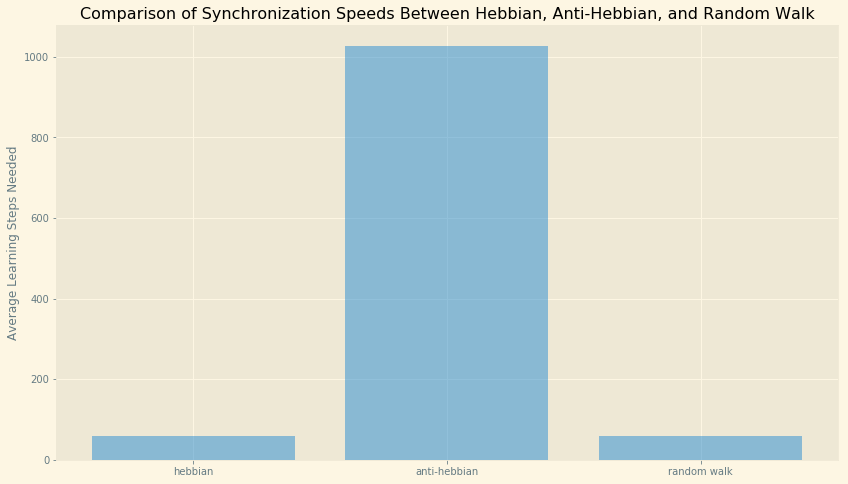

For 3 hidden nodes, 100 inputs per node, and synaptic depth (weight range) 3
[60.1, 1027.7, 60.1]


In [159]:
demonstrate_avg_steps(k=3, n=100, l=3)

In [151]:
def demonstrate_fixed_n(n=4, rule='hebbian'):
    k_three_learning_steps = []
    k_four_learning_steps = []
    k_five_learning_steps = []
    #print("here")
    for k in range(3, 6):
        for l in range(3, 6):
            tpm_alice = TreeParityMachine(k=k, n=n, l=l)
            tpm_bob = TreeParityMachine(k=k, n=n, l=l)
            i = 0
            matches = 0
            percent_synced = 0
            #sync_list = []
            #start = timer()
            while(percent_synced != 100):
                r_input = generate_random_input(k*n)
                tau_a = tpm_alice(r_input)
                tau_b = tpm_bob(r_input)

                if (tau_a == tau_b):
                    tpm_alice.update(tau_b, rule=rule)
                    tpm_bob.update(tau_a, rule=rule)
                    wa = tpm_alice.get_weights()
                    wb = tpm_bob.get_weights()
                    percent_synced = calculate_percent_synced(wa, wb, l)
                    matches+=1
                #sync_list.append(percent_synced)
                #if (i % 100 == 0 or percent_synced == 100):
                    #print("Percent synced: %.2f%%" % percent_synced)

                i+=1
            #end = timer()
            if (k == 3):
                #print("three")
                k_three_learning_steps.append(i)
            if (k == 4):
                #print("four")
                k_four_learning_steps.append(i)
            if (k == 5):
                #print("five")
                k_five_learning_steps.append(i)
    style = 'Solarize_Light2'
    with plt.style.context(style):
        weight_range = np.arange(3, 6, 1)
        fig, ax = plt.subplots(num=style, figsize=(14,8))
        ax.plot(weight_range, k_three_learning_steps, 'blue', label='k=3')
        ax.plot(weight_range, k_four_learning_steps, 'red', label='k=4')
        ax.plot(weight_range, k_five_learning_steps, 'green', label='k=5')
        ax.legend()
        ax.set(xlabel='Synaptic Depth', ylabel='Learning Steps Needed', title='Comparison of Learning Steps for Fixed N Using %s Learning' % rule.title())

    plt.show()
    print("For fixed n=%d, variable k = 3, 4, and 5, synaptic depth (weight range) = 3, 4, and 5" % n)

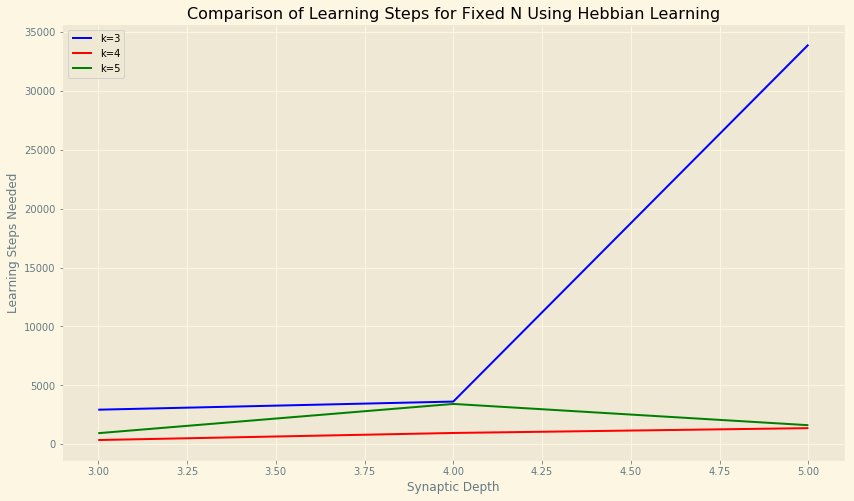

In [160]:
demonstrate_fixed_n(n=4, rule='hebbian')

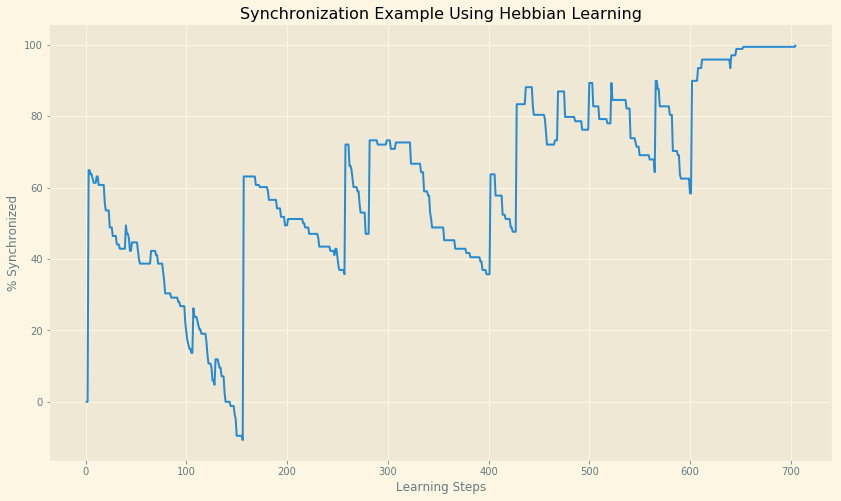

For 7 hidden nodes, 4 inputs per node, and synaptic depth (weight range) 3
Number of iterations: 706
Elapsed time: 0.48
TPM Matches: 390
Final Weights
Alice: [[3. 2. 2. 3. 3. 3. 0. 3. 3. 3. 3. 3. 1. 3. 3. 3. 3. 2. 1. 3. 1. 3. 3. 2.
  3. 3. 3. 2.]]
Bob:   [[3. 2. 2. 3. 3. 3. 0. 3. 3. 3. 3. 3. 1. 3. 3. 3. 3. 2. 1. 3. 1. 3. 3. 2.
  3. 3. 3. 2.]]


In [143]:
demonstrate(k=7, n=4, l=3, rule='hebbian')